<a href="https://colab.research.google.com/github/vannalevaibhav-rcb/Shadowfox-Intermediate-Task-01/blob/main/Delhi_AQI_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name- Delhi Air Quality Analysis**

**Member Name- Vaibhav Vannale**

**Industry- Shadowfox**

**Contribution- Indivisual**

**Task No- Intermediate (1)**

#Github Link-
Github link-https://github.com/vannalevaibhav-rcb/Shadowfox-Intermediate-Task-01

# ***#Let's Start!!***

In [3]:
# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display


In [4]:
# Step 2: Load the CSV file
df = pd.read_csv('/content/delhiaqi.csv')


In [5]:
# Step 3: Explore the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [7]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])


In [8]:
# Extract parts of the date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.day_name()


In [10]:
df[['date', 'month', 'season']].head()

,date,month,season
0,2023-01-01 00:00:00,1,Winter
1,2023-01-01 01:00:00,1,Winter
2,2023-01-01 02:00:00,1,Winter
3,2023-01-01 03:00:00,1,Winter
4,2023-01-01 04:00:00,1,Winter


In [11]:
# Function to assign seasons based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['season'] = df['month'].apply(get_season)

In [12]:
df.columns

Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'year',
       'month', 'day', 'hour', 'weekday', 'season'],
      dtype='object')

In [13]:
pollutants = ['pm25', 'pm10', 'no', 'no2', 'nox', 'nh3', 'co', 'so2', 'o3', 'benzene', 'toluene']


In [14]:
pollutants = ['pm10', 'no', 'no2', 'co', 'so2', 'o3', 'nh3']


In [15]:
seasonal_avg = df.groupby('season')[pollutants].mean()

<Figure size 1200x600 with 0 Axes>

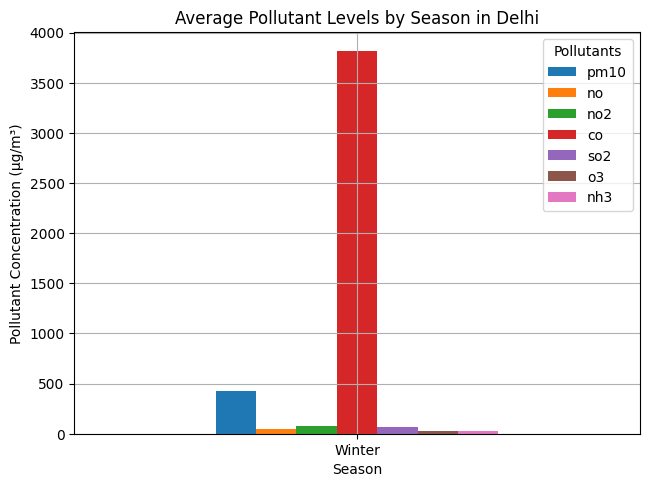

In [17]:
import matplotlib.pyplot as plt

# Plotting the seasonal variation
plt.figure(figsize=(12, 6))
seasonal_avg.plot(kind='bar')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Pollutants')
plt.tight_layout()
plt.title('Average Pollutant Levels by Season in Delhi')
plt.ylabel('Pollutant Concentration (µg/m³)')

plt.show()

In [18]:
print(df.columns.tolist())

['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'year', 'month', 'day', 'hour', 'weekday', 'season']


In [19]:
# Convert 'date' column to datetime and extract only the date part (no time)
df['only_date'] = pd.to_datetime(df['date']).dt.date


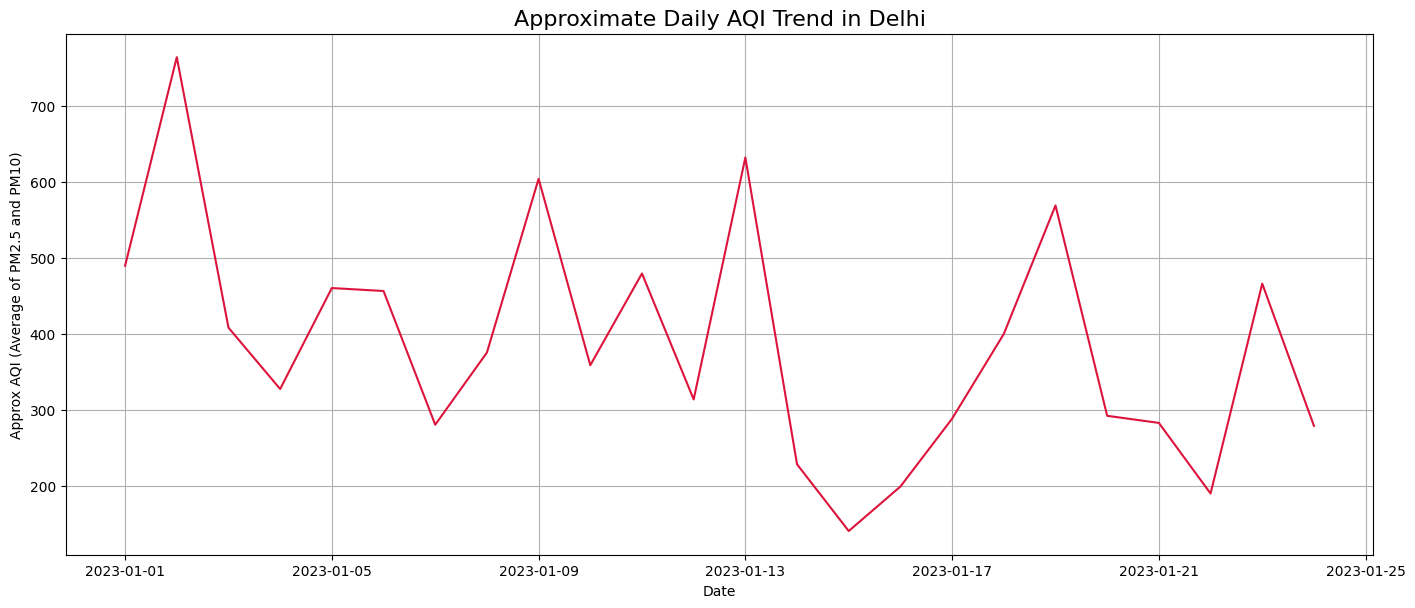

In [21]:
import matplotlib.pyplot as plt

# Step 1: Calculate average of pm2.5 and pm10 per day
daily_avg = df.groupby('only_date')[['pm2_5', 'pm10']].mean()
daily_avg['approx_aqi'] = (daily_avg['pm2_5'] + daily_avg['pm10']) / 2

# Step 2: Plot it
plt.figure(figsize=(14,6))
plt.xlabel("Date")
plt.ylabel("Approx AQI (Average of PM2.5 and PM10)")
plt.grid(True)
plt.tight_layout()
plt.plot(daily_avg.index, daily_avg['approx_aqi'], color='crimson')
plt.title("Approximate Daily AQI Trend in Delhi", fontsize=16)

plt.show()

In [22]:
# Show column names again to verify pollutant columns
df.columns.tolist()


['date',
 'co',
 'no',
 'no2',
 'o3',
 'so2',
 'pm2_5',
 'pm10',
 'nh3',
 'year',
 'month',
 'day',
 'hour',
 'weekday',
 'season',
 'only_date']

In [38]:
def plot_pollution(pollutant):
    daily_avg = df.groupby('only_date')[pollutant].mean()
    plt.figure(figsize=(14, 5))
    sns.lineplot(x=daily_avg.index, y=daily_avg.values)
    plt.title(f'Daily Average of {pollutant.upper()} Over Time')
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant.upper()} Level')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{pollutant}_trend.png')  # 🔽 Save for Option D
    plt.show()

pollutant_dropdown.observe(lambda change: plot_pollution(change['new']), names='value')


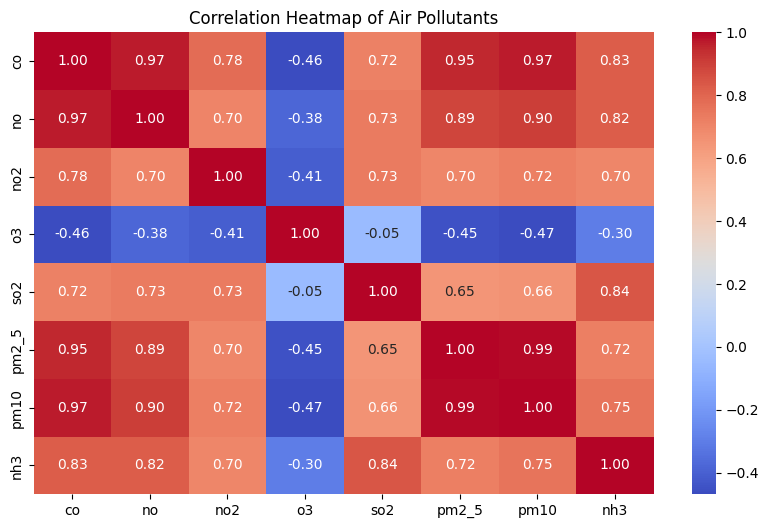

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(pollutant_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Air Pollutants")
plt.show()


In [23]:
# List of pollutant columns
pollutants = ['pm2_5', 'pm10', 'co', 'no', 'no2', 'so2', 'o3', 'nh3']

# Calculate seasonal averages
seasonal_avg = df.groupby('season')[pollutants].mean()

# Display result
seasonal_avg


,pm2_5,pm10,co,no,no2,so2,o3,nh3
season,,,,,,,,
Winter,358.256364,420.988414,3814.94221,51.181979,75.292496,64.655936,30.141943,26.425062


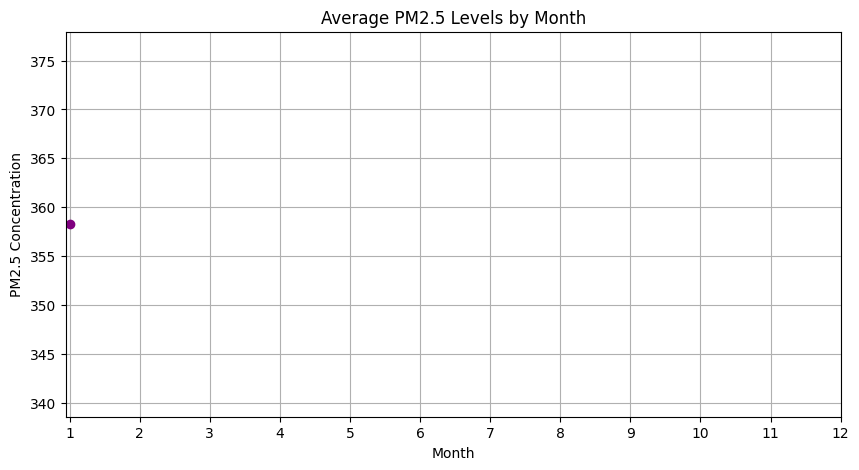

In [41]:
plt.figure(figsize=(10, 5))
monthly_avg.plot(marker='o', color='purple')
plt.title('Average PM2.5 Levels by Month')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentration')
plt.xticks(range(1, 13))  # Ensure months show correctly
plt.grid(True)
plt.show()

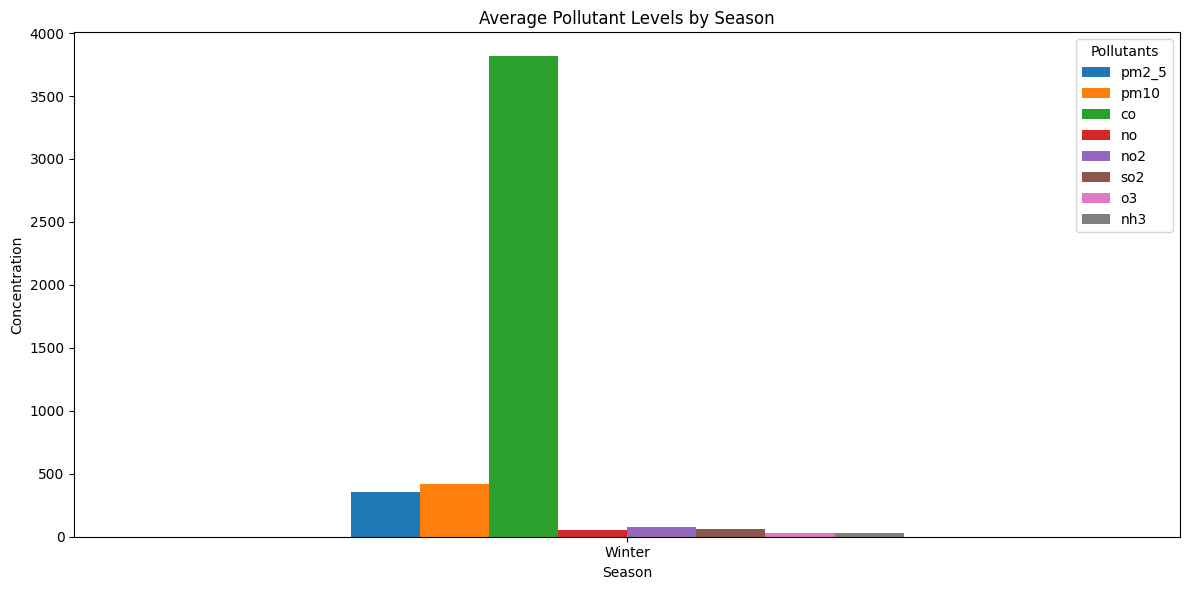

In [24]:
import matplotlib.pyplot as plt

# Plot bar chart
seasonal_avg.plot(kind='bar', figsize=(12,6))
plt.title('Average Pollutant Levels by Season')
plt.ylabel('Concentration')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.legend(title='Pollutants')
plt.tight_layout()
plt.show()


In [25]:
pollutant_cols = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
pollutant_data = df[pollutant_cols]


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


In [28]:
['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'year', 'month', 'day', 'hour', 'weekday', 'season', 'only_date']


['date',
 'co',
 'no',
 'no2',
 'o3',
 'so2',
 'pm2_5',
 'pm10',
 'nh3',
 'year',
 'month',
 'day',
 'hour',
 'weekday',
 'season',
 'only_date']

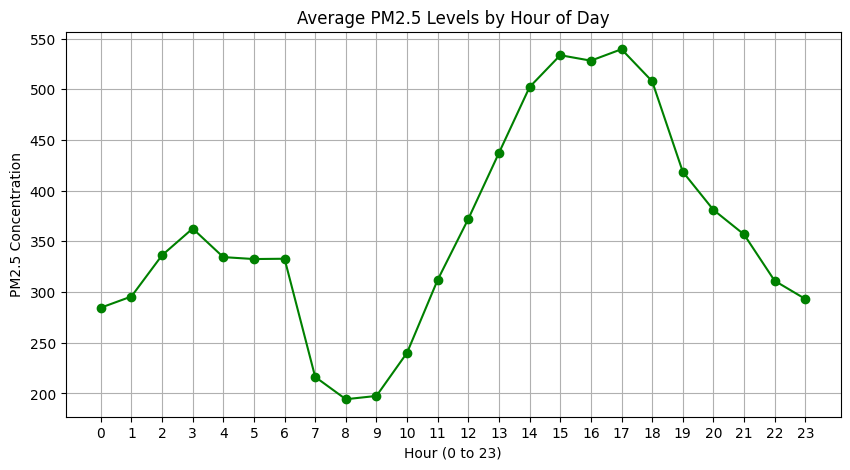

In [42]:
plt.figure(figsize=(10, 5))
hourly_avg.plot(marker='o', color='green')
plt.title('Average PM2.5 Levels by Hour of Day')
plt.xlabel('Hour (0 to 23)')
plt.ylabel('PM2.5 Concentration')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


In [29]:
monthly_avg = df.groupby('month')['pm2_5'].mean()


In [39]:
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

pollutant_dropdown = widgets.Dropdown(
    options=pollutants,
    value='pm2_5',
    description='Pollutant:',
    style={'description_width': 'initial'}
)

display(pollutant_dropdown)


Dropdown(description='Pollutant:', index=5, options=('co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'), …

In [31]:
hourly_avg = df.groupby('hour')['pm2_5'].mean()


In [33]:
df = pd.read_csv('delhiaqi.csv')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Create additional time-based columns
df['only_date'] = df['date'].dt.date
df['month'] = df['date'].dt.month
df['season'] = df['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Summer', 4: 'Summer', 5: 'Summer',
    6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon',
    9: 'Post-Monsoon', 10: 'Post-Monsoon', 11: 'Post-Monsoon'
})


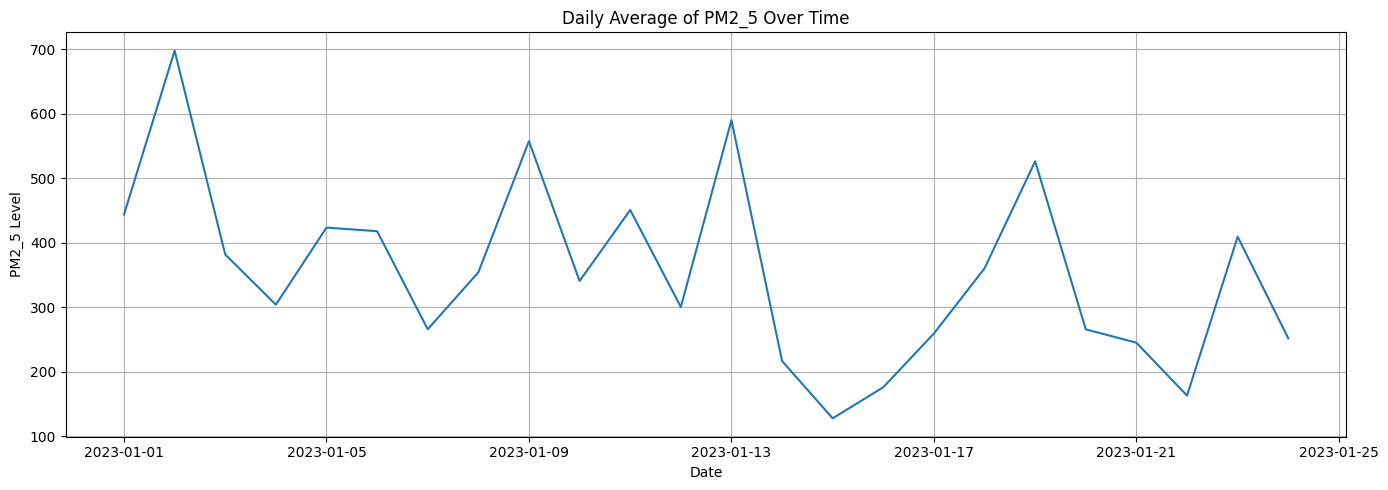

In [36]:
plot_pollution(pollutant_dropdown.value)
